# ETL Transform Phase
## Objective
Apply at least four meaningful transformations to `raw_data.csv` and `incremental_data.csv`, show before-and-after, and save results to `transformed_full.csv` and `transformed_incremental.csv`.
## Transformations
1. **Cleaning**: Handle missing values and duplicates.
2. **Enrichment**: Add `total_price` = `quantity` * `unit_price`.
3. **Structural**: Convert `order_date` to datetime and extract `month`.
4. **Categorization**: Create `price_category` based on `total_price`.
## Tools
- Python, pandas, matplotlib

In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load raw datasets
raw_df = pd.read_csv('data/raw_data.csv')
incremental_df = pd.read_csv('data/incremental_data.csv')

## Transformation 1: Cleaning (Handle Missing Values and Duplicates)
**Why**: Missing values disrupt analysis, and duplicates (e.g., order ID 4) skew results. We fill missing values with defaults and remove duplicates to ensure data quality.

In [2]:
# Before: Show missing values
print('Raw Data Missing Values Before:')
print(raw_df.isnull().sum())
print('\nIncremental Data Missing Values Before:')
print(incremental_df.isnull().sum())

# Cleaning: Fill missing values
for df in [raw_df, incremental_df]:
    df['customer_name'] = df['customer_name'].fillna('Unknown')
    df['quantity'] = df['quantity'].fillna(1.0)  # Default to 1
    df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())  # Use median
    df['order_date'] = df['order_date'].fillna('2024-01-01')  # Default date
    df['region'] = df['region'].fillna('Unknown')

# Remove duplicates in raw_data
raw_df = raw_df.drop_duplicates(subset=['order_id'], keep='first')

# After: Verify no missing values
print('\nRaw Data Missing Values After:')
print(raw_df.isnull().sum())
print('\nIncremental Data Missing Values After:')
print(incremental_df.isnull().sum())

Raw Data Missing Values Before:
order_id          0
customer_name     1
product           0
quantity         26
unit_price       35
order_date        1
region           25
dtype: int64

Incremental Data Missing Values Before:
order_id         0
customer_name    6
product          0
quantity         4
unit_price       0
order_date       0
region           2
dtype: int64

Raw Data Missing Values After:
order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64

Incremental Data Missing Values After:
order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64


## Transformation 2: Enrichment (Add total_price)
**Why**: Calculating `total_price` = `quantity` * `unit_price` adds a key metric for sales analysis, enabling insights into order value.

In [3]:
# Before: Show columns
print('Raw Data Columns Before:', raw_df.columns.tolist())

# Add total_price column
for df in [raw_df, incremental_df]:
    df['total_price'] = df['quantity'] * df['unit_price']

# After: Verify total_price
print('\nRaw Data Head After total_price:')
raw_df[['order_id', 'quantity', 'unit_price', 'total_price']].head()


Raw Data Columns Before: ['order_id', 'customer_name', 'product', 'quantity', 'unit_price', 'order_date', 'region']

Raw Data Head After total_price:


,order_id,quantity,unit_price,total_price
0,1,1.0,500.0,500.0
1,2,1.0,500.0,500.0
2,3,2.0,250.0,500.0
3,4,2.0,750.0,1500.0
4,5,3.0,500.0,1500.0


## Transformation 3: Structural (Convert order_date to datetime, extract month)
**Why**: Converting `order_date` to datetime enables time-based analysis, and extracting `month` supports trend identification (e.g., seasonal sales).

In [4]:
# Before: Show order_date data type
print('Raw Data order_date dtype Before:', raw_df['order_date'].dtype)

# Convert order_date to datetime and extract month
for df in [raw_df, incremental_df]:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['month'] = df['order_date'].dt.month_name()

# After: Verify changes
print('\nRaw Data Head After datetime conversion:')
raw_df[['order_id', 'order_date', 'month']].head()

Raw Data order_date dtype Before: object

Raw Data Head After datetime conversion:


,order_id,order_date,month
0,1,2024-01-20,January
1,2,2024-04-29,April
2,3,2024-01-08,January
3,4,2024-01-07,January
4,5,2024-03-07,March


## Transformation 4: Categorization (Create price_category)
**Why**: Segmenting orders into price categories (Low, Medium, High) based on `total_price` helps identify customer spending patterns.

In [5]:
# Before: Show columns
print('Raw Data Columns Before:', raw_df.columns.tolist())

# Define function to categorize total_price
def categorize_price(total_price):
    if total_price < 500:
        return 'Low'
    elif total_price < 1500:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
for df in [raw_df, incremental_df]:
    df['price_category'] = df['total_price'].apply(categorize_price)

# After: Verify price_category
print('\nRaw Data Head After price_category:')
raw_df[['order_id', 'total_price', 'price_category']].head()

Raw Data Columns Before: ['order_id', 'customer_name', 'product', 'quantity', 'unit_price', 'order_date', 'region', 'total_price', 'month']

Raw Data Head After price_category:


,order_id,total_price,price_category
0,1,500.0,Medium
1,2,500.0,Medium
2,3,500.0,Medium
3,4,1500.0,High
4,5,1500.0,High


## Save Transformed Data
Save transformed datasets to `data/transformed/` folder.

In [8]:
# Ensure transformed/ folder exists
import os
os.makedirs('transformed', exist_ok=True)

# Save transformed datasets
raw_df.to_csv('transformed/transformed_full.csv', index=False)
incremental_df.to_csv('transformed/transformed_incremental.csv', index=False)
print('Transformed datasets saved to transformed/')

Transformed datasets saved to transformed/



## Bonus: Visualization
Plot total sales by product to gain insights and earn bonus marks.


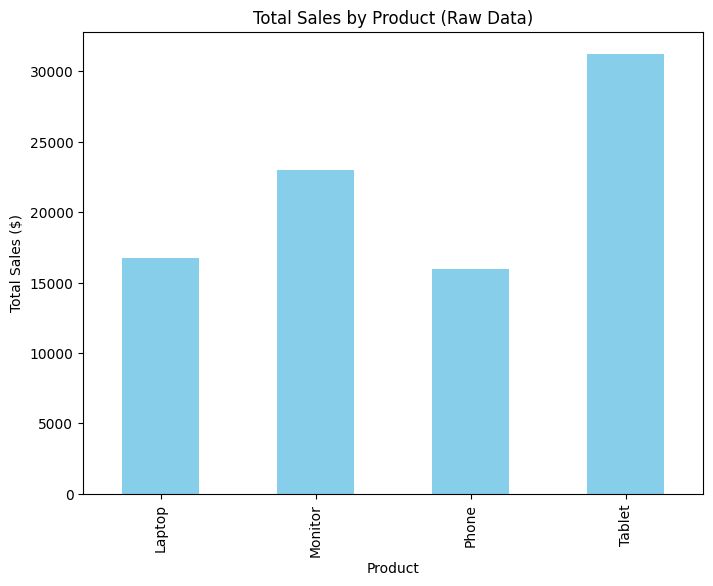

In [9]:
# Calculate total sales by product
sales_by_product = raw_df.groupby('product')['total_price'].sum()

# Create bar chart
plt.figure(figsize=(8, 6))
sales_by_product.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product (Raw Data)')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.savefig('sales_by_product.png')  # Save for README
plt.show()